In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fibermode

import phi_intensity

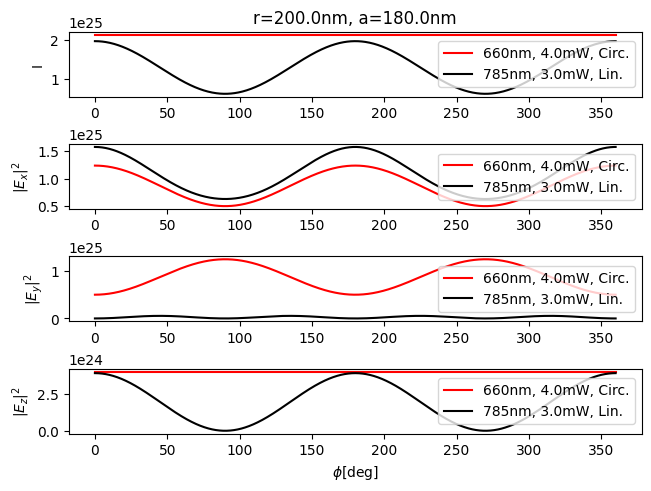

In [2]:
# Parameters
radius = 200e-9 # Fiber radius [m]
a = 180e-9 # Particle size [m]
core_index = 1.45
clad_index = 1.0
P660 = 4.0e-3
P785 = 3.0e-3

phi_intensity.main(radius=radius,
                   a=a,
                   core_index=core_index,
                   clad_index=clad_index,
                   P660=P660,
                   P785=P785)

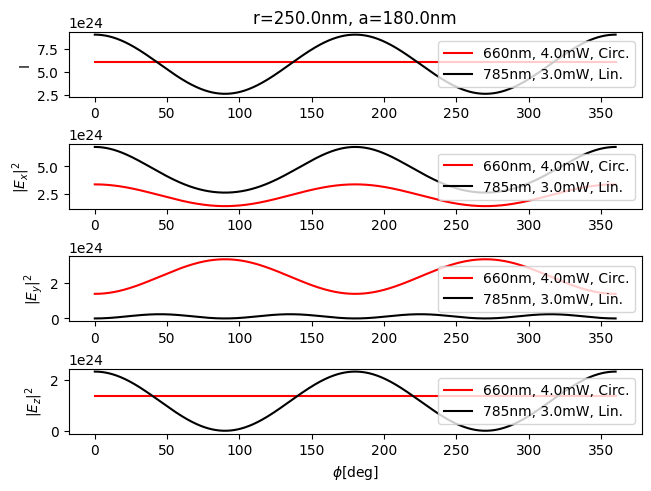

In [3]:
# Parameters
radius = 250e-9 # Fiber radius [m]
a = 180e-9 # Particle size [m]
core_index = 1.45
clad_index = 1.0
P660 = 4.0e-3
P785 = 3.0e-3

phi_intensity.main(radius=radius,
                   a=a,
                   core_index=core_index,
                   clad_index=clad_index,
                   P660=P660,
                   P785=P785)

<Figure size 640x480 with 0 Axes>

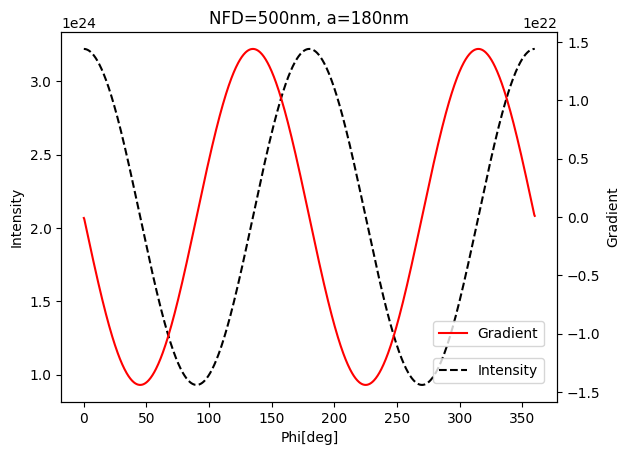

In [5]:
# Parameters
radius = 300e-9 # Fiber radius [m]
a = 180e-9 # Particle size [m]
core_index = 1.45
clad_index = 1.0
P660 = 4.0e-3
P785 = 3.0e-3

# Polar coordinates
rho = radius + a/2
phi = np.linspace(0, 2*np.pi, 1000)
phi_deg = phi * 180/np.pi  #[deg]

def linearmode(wavelength, radius, core_index, clad_index, power, pol):
    mode = fibermode.HE(wavelength=wavelength,
                        radius=radius,
                        core_index=core_index,
                        clad_index=clad_index,
                        power=power)
    Ex = mode.Ex(rho=rho, phi=phi, pol=pol)
    Ey = mode.Ey(rho=rho, phi=phi, pol=pol)
    Ez = mode.Ez(rho=rho, phi=phi, pol=pol)
    return Ex, Ey, Ez

Ex785, Ey785, Ez785 = linearmode(wavelength=785e-9,
                                     radius=radius,
                                     core_index=core_index,
                                     clad_index=clad_index,
                                     power=P785,
                                     pol=0)
I785 = np.abs(Ex785)**2 + np.abs(Ey785)**2 + np.abs(Ez785)**2
I785_grad = np.gradient(I785)

plt.figure()
fig, ax1 = plt.subplots()
ax1.plot(phi_deg, I785, 'k--', label='Intensity')
ax1.set_xlabel('Phi[deg]')
ax1.set_ylabel('Intensity')
ax1.legend(loc=(0.75, 0.05))

ax2=ax1.twinx()
ax2.plot(phi_deg, I785_grad, 'r', label='Gradient')
ax2.set_ylabel('Gradient')
ax2.legend(loc=(0.75, 0.15))
ax1.set_title('NFD=500nm, a=180nm')
plt.show()

<Figure size 640x480 with 0 Axes>

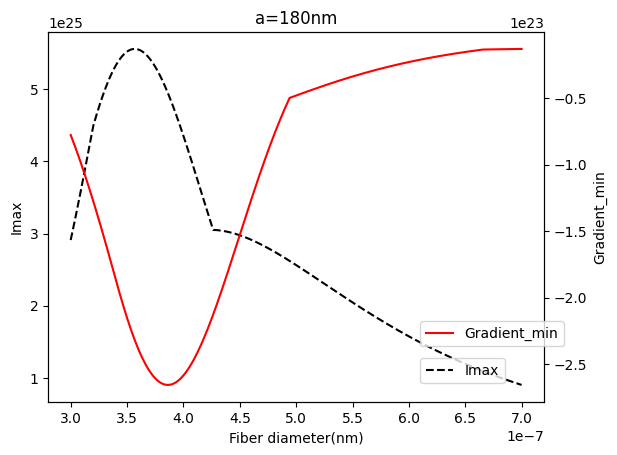

In [6]:
# Parameters
radius = np.linspace(150e-9, 350e-9, 1000) # Fiber radius [m]
diameter = 2*radius
a = 180e-9 # Particle size [m]
core_index = 1.45
clad_index = 1.0
P660 = 4.0e-3
P785 = 3.0e-3

# Polar coordinates
rho = radius + 10e-9
phi = np.linspace(0, np.pi, 1000)
phi_deg = phi * 180/np.pi  #[deg]

def linearmode(wavelength, radius, core_index, clad_index, power, pol):
    mode = fibermode.HE(wavelength=wavelength,
                        radius=radius,
                        core_index=core_index,
                        clad_index=clad_index,
                        power=power)
    Ex = mode.Ex(rho=rho, phi=phi, pol=pol)
    Ey = mode.Ey(rho=rho, phi=phi, pol=pol)
    Ez = mode.Ez(rho=rho, phi=phi, pol=pol)
    return Ex, Ey, Ez

I785_max = np.zeros(np.shape(radius))
I785_grad_min = np.zeros(np.shape(radius))
for i in np.arange(len(radius)):
    Ex785, Ey785, Ez785 = linearmode(wavelength=785e-9,
                                    radius=radius[i],
                                    core_index=core_index,
                                    clad_index=clad_index,
                                    power=P785,
                                    pol=0)
    I785 = np.abs(Ex785)**2 + np.abs(Ey785)**2 + np.abs(Ez785)**2
    I785_max[i] = np.amax(I785)
    I785_grad = np.gradient(I785)
    I785_grad_min[i] = np.amin(I785_grad)

plt.figure()
fig, ax1 = plt.subplots()
ax1.plot(diameter, I785_max, 'k--', label='Imax')
ax1.set_xlabel('Fiber diameter(nm)')
ax1.set_ylabel('Imax')
ax1.legend(loc=(0.75, 0.05))

ax2=ax1.twinx()
ax2.plot(diameter, I785_grad_min, 'r', label='Gradient_min')
ax2.set_ylabel('Gradient_min')
ax2.legend(loc=(0.75, 0.15))
ax1.set_title('a=180nm')
plt.show()

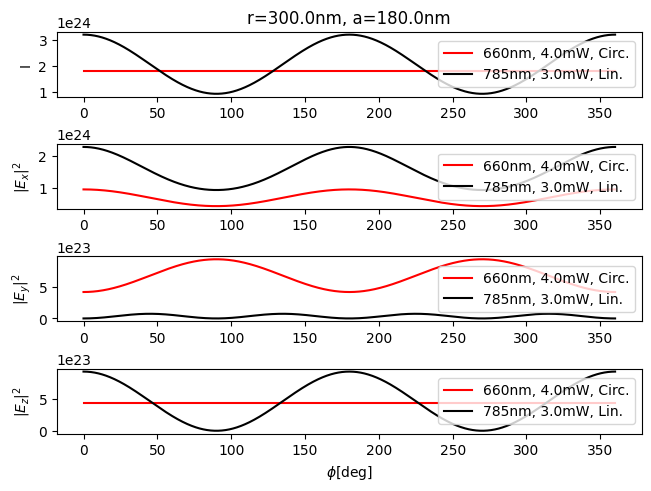

In [6]:
# Parameters
radius = 300e-9 # Fiber Radius [m]
a = 180e-9 # Particle size [m]
core_index = 1.45
clad_index = 1.0
P660 = 4.0e-3
P785 = 3.0e-3

phi_intensity.main(radius=radius,
                   a=a,
                   core_index=core_index,
                   clad_index=clad_index,
                   P660=P660,
                   P785=P785)